In [12]:
from vespa import FPPCalculation, PopulationSet
from vespa.transit_basic import traptransit

In [118]:
fpp = FPPCalculation.from_ini('K02056.01')
#fpp = FPPCalculation.from_ini('K00289.02')

pl = fpp['pl']
eb = fpp['eb']

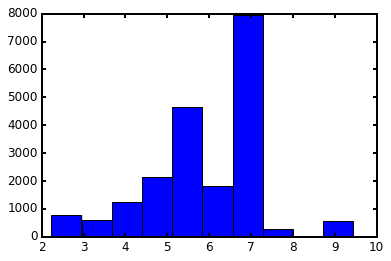

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.hist(pl.stars.slope.values);

(0.021916149743264016, 1.9610808403882992e-08, 8.6807132126521243)


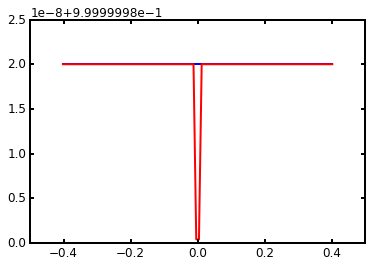

In [76]:
i=1082
sec = True
pop = eb
#u1_orig, u2_orig = pl.stars.loc[i, ['u1_1', 'u2_1']]
#pop.stars.loc[i, ['u1_1']] = 0.18
#pop.stars.loc[i, ['u2_1']] = 0.42
t,f = pl.eclipse(i, secondary=sec)
plt.plot(t,f)
pars = pop.eclipse_trapfit(i, secondary=sec)
print pars
plt.plot(t, traptransit(t, np.array(pars+(0,))), 'r');
#pop.stars.loc[i, ['u1_1']] = u1_orig
#pop.stars.loc[i, ['u2_1']] = u2_orig

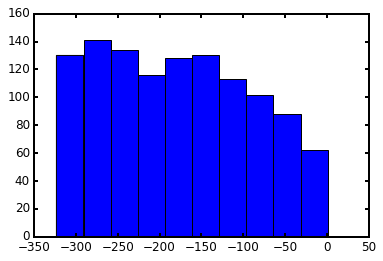

In [121]:
sig = fpp.trsig
y = pl.kde(sig.kde.dataset)

plt.hist(np.log10(y[y>0]));

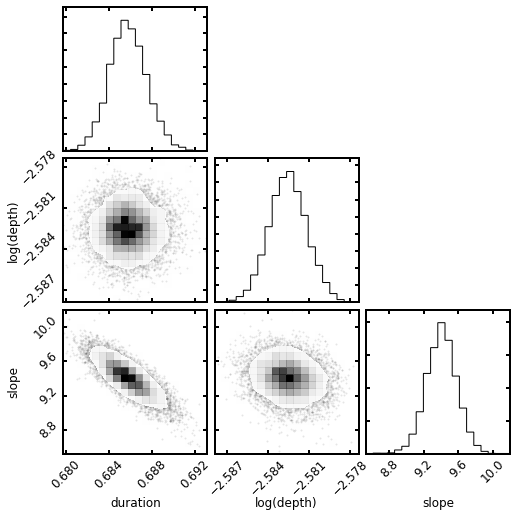

In [114]:
from corner import corner

corner(sig.kde.dataset.T, labels=['duration', 'log(depth)', 'slope'], plot_contours=False);

In [108]:
pl.lhood(sig, recalc=True)/10000

0.00075336148460973496

In [106]:
pl.kde.integrate_kde(sig.kde)

0.0020682681583579711

In [107]:
eb.kde.integrate_kde(sig.kde)

2.4352482756502904e-07

In [91]:
pl.kde.dataset

array([[ 0.64053632,  0.12937627,  0.35002951, ...,  0.39279847,
         0.1803392 ,  0.83559484],
       [-3.51228498, -3.2883971 , -3.59456565, ..., -3.13559734,
        -3.65020197, -3.09568721],
       [ 8.92540972,  4.64266644,  6.64466588, ...,  6.62011179,
         5.2664769 ,  9.02173174]])

In [97]:
y = pl.kde(sig.kde.dataset)

In [99]:
len(y)

10000

In [101]:
(y > 0.01).sum()

6

In [104]:
np.where(y==y.max())

(array([9231]),)

In [105]:
sig.kde.dataset[:,9231]

array([ 0.22310352, -3.30108126,  6.68142678])

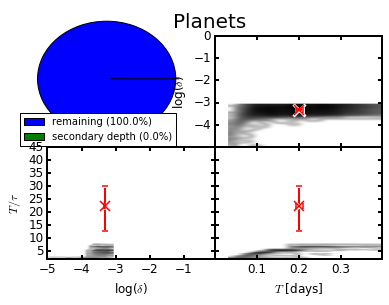

In [86]:
pl.lhoodplot(sig, logscale=True)

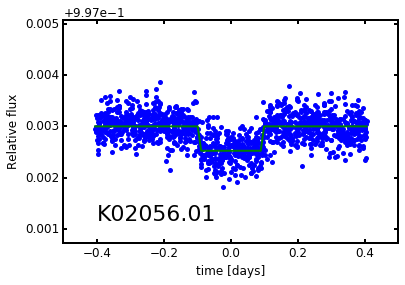

In [78]:
sig.plot(plot_trap=True)

In [10]:
pl.eclipse_trapfit(3473)

(0.4467532885336799, 0.00028182804200986301, 9.4464935679534392)